In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'darkgrid')

df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

df.drop(columns='Unnamed: 0',inplace = True)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pallav\AppData\Local\Temp\ipykernel_3004\3929707507.py:9: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')


In [2]:
df_alt = df[df['name'] != 'Bitcoin'].copy()

In [3]:
t1 = df_alt.groupby('name')[['price','total_volume']].mean()


In [4]:
t1

,price,total_volume
name,,
Avalanche,33.481214,3.564664e+08
Binance Coin,306.076894,1.589510e+09
Bitcoin Cash,331.498606,1.261566e+10
Cardano,0.489143,5.351359e+08
Chainlink,11.067659,3.661100e+08
Dogecoin,0.058885,4.154876e+08
Ethena USDe,0.537858,9.739673e+07
Ethereum,1238.402704,1.813941e+10
Hedera,0.122402,4.229676e+07


In [5]:
t1.sort_values(by = 'price',ascending = False,inplace = True)

In [6]:
t1

,price,total_volume
name,,
Ethereum,1238.402704,1.813941e+10
Bitcoin Cash,331.498606,1.261566e+10
Binance Coin,306.076894,1.589510e+09
Solana,80.053279,1.010102e+09
Litecoin,64.190498,1.091134e+09
Avalanche,33.481214,3.564664e+08
Hyperliquid,27.090783,3.323296e+08
Chainlink,11.067659,3.661100e+08
Toncoin,4.094922,5.789905e+07


In [7]:
p1 = t1.head(7)
p1['total_volume'] = p1['total_volume'].apply(lambda x:f'{x/1_000_000_000:.2f}B')

In [9]:
p1 = p1.reset_index()

In [10]:
p1

,name,price,total_volume
0,Ethereum,1238.402704,18.14B
1,Bitcoin Cash,331.498606,12.62B
2,Binance Coin,306.076894,1.59B
3,Solana,80.053279,1.01B
4,Litecoin,64.190498,1.09B
5,Avalanche,33.481214,0.36B
6,Hyperliquid,27.090783,0.33B


Text(0.5, 1.0, 'Volume v/s Price Distribution of Altcoins of Top 7 Altcoins')

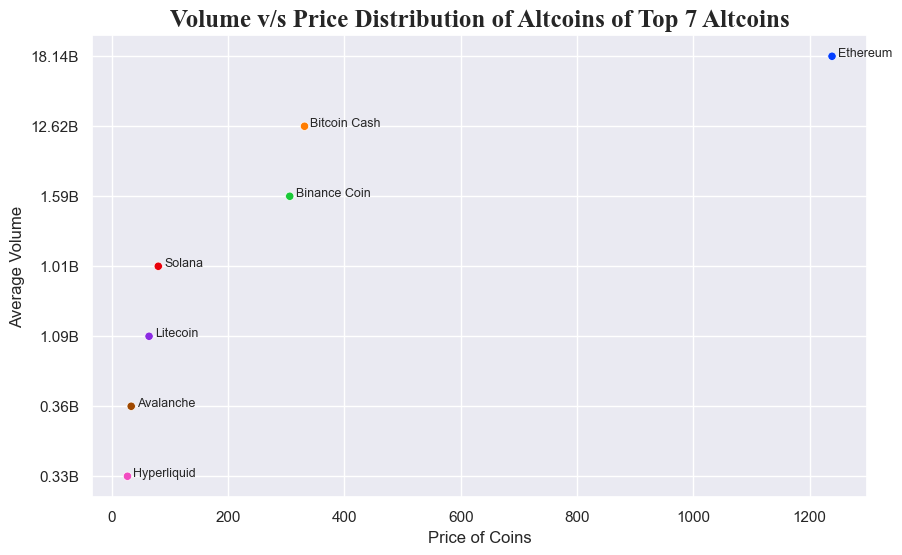

In [30]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = p1,x = 'price',y = 'total_volume',hue = 'name',palette='bright')
texts = []
for i in range(len(p1)):
    texts.append(plt.text(p1['price'].iloc[i]+10, p1['total_volume'].iloc[i], p1['name'].iloc[i], fontsize=9))
plt.xlabel('Price of Coins')
plt.ylabel('Average Volume')
plt.legend().set_visible(False)
plt.title('Volume v/s Price Distribution of Altcoins of Top 7 Altcoins',fontsize = 18,fontweight = 'bold',fontfamily = 'Times New Roman')

In [31]:
df_btc = df[df['name'] == 'Bitcoin'].copy()

In [60]:
t2 = df_btc.groupby('date')[['price','total_volume']].median()

In [66]:
t2 = t2.reset_index()

In [67]:
t2

,date,price,total_volume
0,2013-04-29,144.54,0.000000e+00
1,2013-04-30,139.00,0.000000e+00
2,2013-05-01,116.99,0.000000e+00
3,2013-05-02,105.21,0.000000e+00
4,2013-05-03,97.75,0.000000e+00
...,...,...,...
4482,2025-08-06,114153.00,5.863449e+10
4483,2025-08-07,114379.00,5.442015e+10
4484,2025-08-09,116419.00,5.413797e+10
4485,2025-08-10,118147.00,6.012536e+10


In [83]:
from matplotlib.ticker import FuncFormatter
sns.set(style = 'whitegrid')

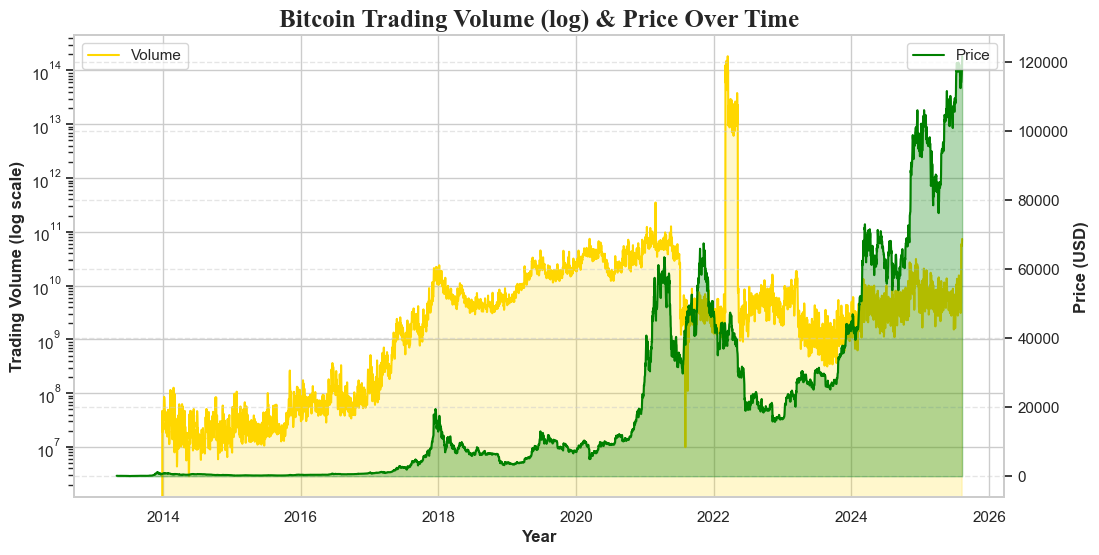

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# --- Plot VOLUME (primary y-axis, log scale) ---
ax1 = plt.gca()
sns.lineplot(data=t2, x='date', y='total_volume', color='gold', label='Volume', ax=ax1)
ax1.fill_between(t2['date'], t2['total_volume'], color='gold', alpha=0.2)
ax1.set_yscale('log')
ax1.set_ylabel("Trading Volume (log scale)", fontweight='bold')
ax1.legend(loc="upper left")

# --- Plot PRICE (secondary y-axis, linear scale) ---
ax2 = ax1.twinx()
sns.lineplot(data=t2, x='date', y='price', color='green', label='Price', ax=ax2)
ax2.fill_between(t2['date'], t2['price'], color='green', alpha=0.3)
ax2.set_ylabel("Price (USD)", fontweight='bold')
ax2.legend(loc="upper right")

# --- Title, labels, grid ---
plt.title("Bitcoin Trading Volume (log) & Price Over Time", 
          fontsize=18, fontweight='bold', fontfamily='Times New Roman')
ax1.set_xlabel("Year", fontweight='bold')
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()

